<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/Dataset/extended_marketing_data_new.xlsx'

In [ ]:
df = pd.read_excel(path)
df.head(20)

,Customer ID,Age,Gender,Total Spent,Converted,Comments,Purchased Category,Stock
0,1,23,F,150,1,Satisfied with the service,Clothing,4
1,2,35,M,600,1,Needs improvement in delivery,Beauty,86
2,3,45,F,800,0,Regular customer,Books,24
3,4,52,M,200,0,Occasional buyer,Beauty,10
4,5,29,F,300,1,High spender,Books,47
5,6,41,M,450,0,Average experience,Books,86
6,7,38,F,670,1,Prefers online shopping,Home Goods,69
7,8,27,M,120,1,New customer,Home Goods,0
8,9,50,F,500,0,Loyal to the brand,Electronics,86
9,10,33,M,750,1,High conversion rate,Clothing,45


In [ ]:
from scipy import stats

df['Z_Total_Spent'] = stats.zscore(df['Total Spent'])


outliers = df[(df['Z_Total_Spent'] > 3) | (df['Z_Total_Spent'] < -3)]
print("Outliers based on Total Spent Z-score:")
print(outliers[['Customer ID', 'Total Spent', 'Z_Total_Spent']])

Outliers based on Total Spent Z-score:
Empty DataFrame
Columns: [Customer ID, Total Spent, Z_Total_Spent]
Index: []


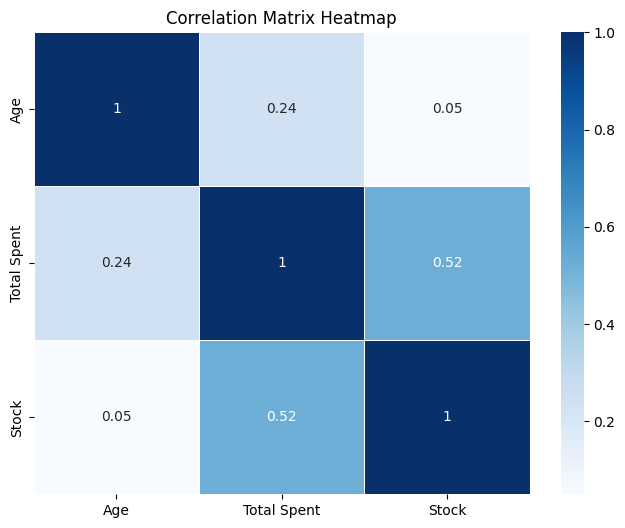

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['Age', 'Total Spent', 'Stock']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

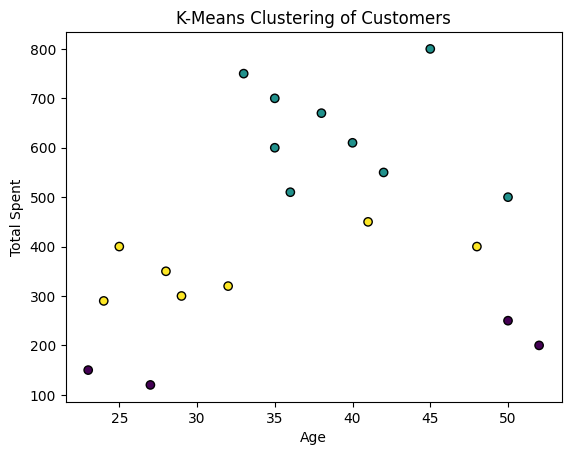

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['Age', 'Total Spent']])


plt.scatter(df['Age'], df['Total Spent'], c=df['cluster'], cmap='viridis', edgecolor='k')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.show()

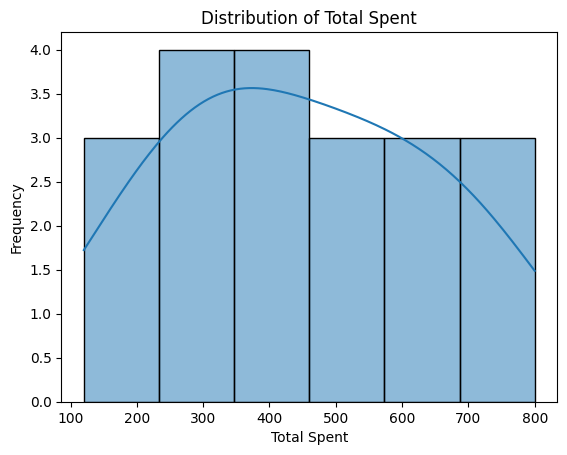

In [ ]:
sns.histplot(df['Total Spent'], kde=True)
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Gender'])
print(df[['Customer ID', 'Gender', 'Gender_Encoded']].head())

   Customer ID Gender  Gender_Encoded
0            1      F               0
1            2      M               1
2            3      F               0
3            4      M               1
4            5      F               0


In [ ]:
pivot_table = df.pivot_table(values='Total Spent', index='Purchased Category', columns='Gender', aggfunc='mean')
print("Pivot Table - Average Total Spent by Category and Gender:")
print(pivot_table)

Pivot Table - Average Total Spent by Category and Gender:
Gender                  F      M
Purchased Category              
Beauty              400.0  400.0
Books               475.0  450.0
Clothing            150.0  725.0
Electronics         505.0  335.0
Home Goods          560.0  205.0


In [15]:
top_customers = df.nlargest(5, 'Total Spent')
print("Top 5 Customers by Total Spent:")
print(top_customers[['Customer ID', 'Total Spent']])

Top 5 Customers by Total Spent:
    Customer ID  Total Spent
2             3          800
9            10          750
17           18          700
6             7          670
10           11          610


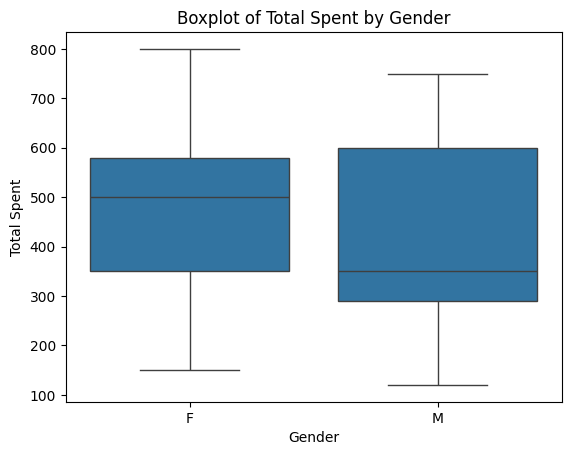

In [16]:
sns.boxplot(x='Gender', y='Total Spent', data=df)
plt.title('Boxplot of Total Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spent')
plt.show()

In [17]:
conversion_rate = df.groupby('Purchased Category')['Converted'].mean() * 100
print("Conversion Rate by Purchased Category (%):")
print(conversion_rate)

Conversion Rate by Purchased Category (%):
Purchased Category
Beauty          66.666667
Books           20.000000
Clothing       100.000000
Electronics     50.000000
Home Goods      80.000000
Name: Converted, dtype: float64


In [18]:
from sklearn.linear_model import LinearRegression

x = df[['Age']]
y = df['Total Spent']
lin_reg = LinearRegression()
lin_reg.fit(x, y)


print(f"Intercept: {lin_reg.intercept_}")
print(f"Slope: {lin_reg.coef_[0]}")

Intercept: 249.25713036143833
Slope: 5.368154696822965


In [19]:
crosstab = pd.crosstab(df['Purchased Category'], df['Converted'])
print("Cross Tabulation of Gender and Converted:")
print(crosstab)

Cross Tabulation of Gender and Converted:
Converted           0  1
Purchased Category      
Beauty              1  2
Books               4  1
Clothing            0  3
Electronics         2  2
Home Goods          1  4


In [20]:
average_conversion_rate = df['Converted'].mean()
df['CLV'] = df['Total Spent'] * average_conversion_rate
print("Customer Lifetime Value Estimation:")
print(df[['Customer ID', 'Total Spent', 'CLV']])

Customer Lifetime Value Estimation:
    Customer ID  Total Spent    CLV
0             1          150   90.0
1             2          600  360.0
2             3          800  480.0
3             4          200  120.0
4             5          300  180.0
5             6          450  270.0
6             7          670  402.0
7             8          120   72.0
8             9          500  300.0
9            10          750  450.0
10           11          610  366.0
11           12          290  174.0
12           13          400  240.0
13           14          320  192.0
14           15          510  306.0
15           16          350  210.0
16           17          550  330.0
17           18          700  420.0
18           19          250  150.0
19           20          400  240.0


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Scaled_Total_Spent_MinMax'] = scaler.fit_transform(df[['Total Spent']])
print("Scaled Total Spent using Min-Max:")
print(df[['Customer ID', 'Total Spent', 'Scaled_Total_Spent_MinMax']].head())

Scaled Total Spent using Min-Max:
   Customer ID  Total Spent  Scaled_Total_Spent_MinMax
0            1          150                   0.044118
1            2          600                   0.705882
2            3          800                   1.000000
3            4          200                   0.117647
4            5          300                   0.264706


<ipython-input-22-d4b4da65aa85>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased Category', data=df, palette='Set2')


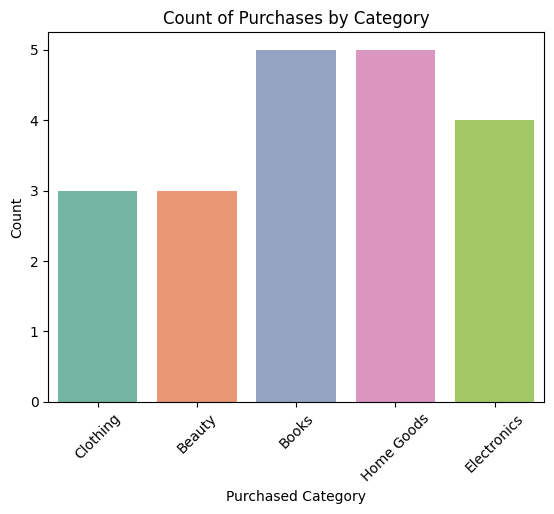

In [22]:
sns.countplot(x='Purchased Category', data=df, palette='Set2')
plt.title('Count of Purchases by Category')
plt.xlabel('Purchased Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-23-42e53fbd46fc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased Category', data=df, palette='Set1')


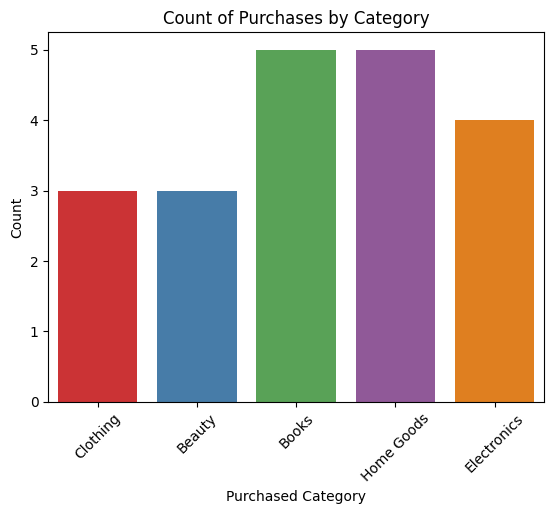

In [23]:
sns.countplot(x='Purchased Category', data=df, palette='Set1')
plt.title('Count of Purchases by Category')
plt.xlabel('Purchased Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-24-61ecd0d5c204>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased Category', data=df, palette='Set3')


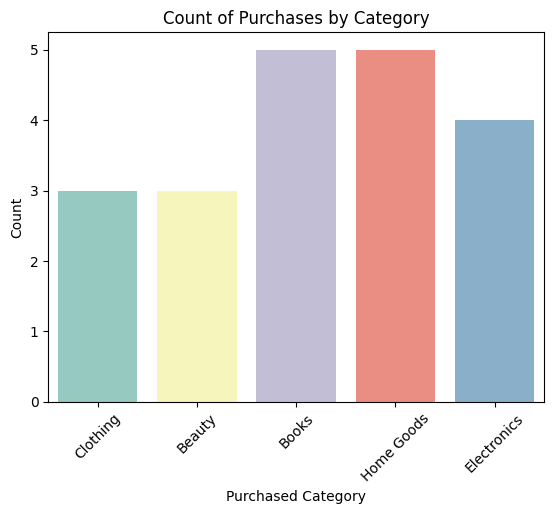

In [24]:
sns.countplot(x='Purchased Category', data=df, palette='Set3')
plt.title('Count of Purchases by Category')
plt.xlabel('Purchased Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
bins = [18, 25, 35, 45, 60]
labels = ['18-25', '26-35', '36-45', '46-60']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


age_group_dist = df['Age_Group'].value_counts()
print("Age Group Distribution:")
print(age_group_dist)

Age Group Distribution:
Age_Group
26-35    7
36-45    6
46-60    4
18-25    3
Name: count, dtype: int64
